In [1]:
import numpy as np
import matplotlib.pyplot as py


1.	Download the time series of global mean surface air temperature as a csv file from the GISS website. 

https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv

Please use the numpy loadtxt function to read the file. Then create an array for the date and another array for the temperature data by slicing the output array that is the main output from the np.loadtxt function.

In [2]:
#filename with the NASA GISS TEMP data
datafile = "graph.csv"

In [3]:
#read into numpy array
print("Read data from file:", datafile)
data = np.loadtxt(datafile, delimiter = ",", skiprows=3)

Read data from file: graph.csv


In [4]:
print("Dimensions of data object are: ", data.shape)
date         = data[:,0] #create an numpy array to hold the date
dataTemp      = data[:,1] #create an numpy array to hold the CO2 data
print ("First set of data points are: ", date[0],dataTemp[0])

Dimensions of data object are:  (141, 3)
First set of data points are:  1880.0 -0.16


2.	Plot the unsmoothed time series (the second column in the text file) using the plot function from matplotlib. Create a plot with both the x and y axes appropriately labeled with the correct units and add a title on the top to describe the graph. Make sure the data fit within the graph boundaries.

Text(0.5, 1.0, 'Global Annual Mean Surface Air Temperature Change')

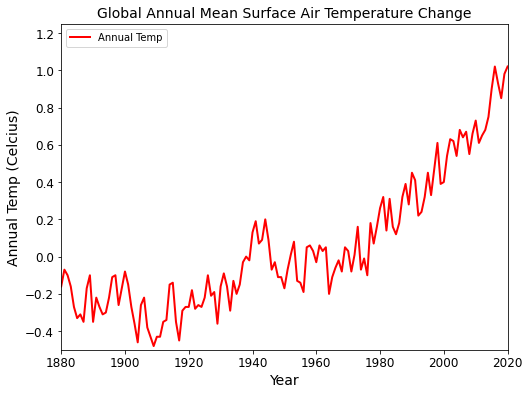

In [5]:
fig = py.figure(figsize=(8,6)) # size is optional
my_font_size = 12
ax1 = fig.add_subplot(1,1,1) # (rows, cols, plot)
ax1.plot(date, dataTemp, color="red", label="Annual Temp", linewidth=2)
ax1.set_ylim(-0.5, 1.25)
ax1.set_xlim(1880.0, 2020)
ax1.set_ylabel("Annual Temp (Celcius)", fontsize = my_font_size + 2)
ax1.set_xlabel("Year", fontsize = my_font_size+ 2)
ax1.tick_params(labelsize = my_font_size)
ax1.legend(loc = "upper left")
ax1.set_title("Global Annual Mean Surface Air Temperature Change", fontsize = my_font_size +2)


Problem 3) 3.	Add a line to your graph for the smoothed data (the third column in your time series). Plot this with a different color and linewidth. Plot this graph separately in your Jupyter notebook from the one you generated for problem 2. My understanding is that this means to re-plot the results from problem 2 w/ the additional smoothed data overlaid.


In [6]:
dataSmooth = data[:,2] #create an numpy array to hold the 3rd col smooth data
print ("First set of data points for 2nd plot are: ", date[0],dataSmooth[0])

First set of data points for 2nd plot are:  1880.0 -0.08


3.	Add a line to your graph for the smoothed data (the third column in your time series). Plot this with a different color and linewidth. Plot this graph separately in your Jupyter notebook from the one you generated for problem 2.

Text(0.5, 1.0, 'Global Annual Mean Surface Air Temperature Change')

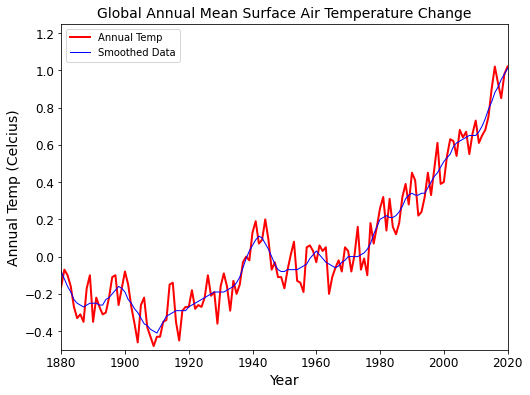

In [7]:
fig = py.figure(figsize=(8,6)) # size is optional
my_font_size = 12
ax1 = fig.add_subplot(1,1,1) # (rows, cols, plot)
ax1.plot(date, dataTemp, color="red", label="Annual Temp", linewidth=2)
ax1.plot(date, dataSmooth, color="blue", label="Smoothed Data", linewidth=1)
ax1.set_ylim(-0.5, 1.25)
ax1.set_xlim(1880.0, 2020)
ax1.set_ylabel("Annual Temp (Celcius)", fontsize = my_font_size + 2)
ax1.set_xlabel("Year", fontsize = my_font_size+ 2)
ax1.tick_params(labelsize = my_font_size)
ax1.legend(loc = "upper left")
ax1.set_title("Global Annual Mean Surface Air Temperature Change", fontsize = my_font_size +2)


4.	Average together the first 5 data points in the time series to cut down on interannual variability and the last 5 points and report these values using the print function. Compute the temperature increase between the beginning and end of the time series by taking the difference between these two mean values. How much did global surface air temperature increase since the beginning of the record?


In [8]:
#splice dataTemp array into first and last 5 points
Y1 = np.zeros(5)
Y2 = np.zeros(5)

print(Y1.shape, Y2.shape)

(5,) (5,)


In [9]:
#ends 
        
Y1 = dataTemp[0:5]
Y2 = dataTemp[-5:]
print("First 5 points:", Y1)
print("Last 5 points:", Y2)

F5 = np.sum(Y1)
L5 = np.sum(Y2)
print("First 5 Average:", F5/5)
print("Last 5 Average:", L5/5)

Now = (L5 - F5)/10
print("On average global surface air temperature has increased\n", Now, "celcius between 1880-2020")

First 5 points: [-0.16 -0.07 -0.1  -0.16 -0.27]
Last 5 points: [1.02 0.93 0.85 0.98 1.02]
First 5 Average: -0.152
Last 5 Average: 0.9600000000000002
On average global surface air temperature has increased
 0.556 celcius between 1880-2020


5.  Create a cleaned histogram of the temperature time series, and label the x and y axes and add a title to the plot. Please have at least 20 bins.


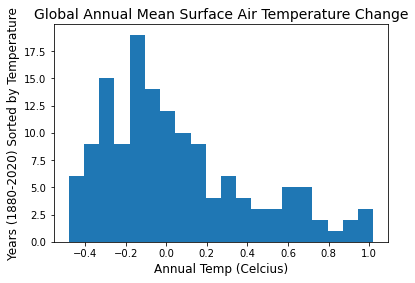

In [10]:
fig = py.figure()
ax = py.axes()
ax.hist(dataTemp, bins = 20)
ax.set_ylabel("Years (1880-2020) Sorted by Temperature", fontsize = 12)
ax.set_xlabel("Annual Temp (Celcius)", fontsize = 12)
ax.set_title("Global Annual Mean Surface Air Temperature Change", fontsize = 14);


In [11]:
LastYears = date[-20:]
LastTemps = dataTemp[-20:]

LastYears[::-1].sort()
print(LastYears)

LastTemps[::-1].sort()
print(LastTemps)

[2020. 2019. 2018. 2017. 2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009.
 2008. 2007. 2006. 2005. 2004. 2003. 2002. 2001.]
[1.02 1.02 0.98 0.93 0.9  0.85 0.75 0.73 0.68 0.68 0.67 0.66 0.65 0.64
 0.63 0.62 0.61 0.55 0.54 0.54]


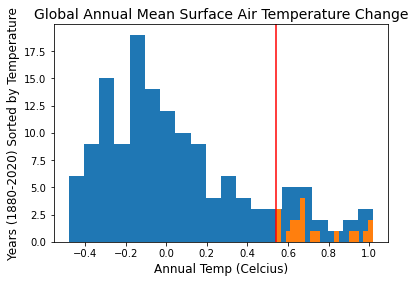

In [12]:
fig = py.figure()
ax = py.axes()
ax.hist(dataTemp, bins = 20)
ax.hist(LastTemps, bins = 20)
ax.axvline(dataTemp[-1], color = "red")
ax.set_ylabel("Years (1880-2020) Sorted by Temperature", fontsize = 12)
ax.set_xlabel("Annual Temp (Celcius)", fontsize = 12)
ax.set_title("Global Annual Mean Surface Air Temperature Change", fontsize = 14);

The second set, comprised of the last 20 years (LastTemps) is skewed to the right tail of the distribution representing a consistent increase in global average surface temperatures. The red line showing the data for the most current year (2020) is also in the right tail of the average annual temperature distribution.


7.	Find the temperature anomaly in the year 1988. Your program should take the year as a user defined variable (for example: myyear = 1988), find the appropriate array index in the date array, and then use this index to access the right temperature value in your temperature array. Hint: look at the numpy where function. Or Google “how do I find the index corresponding to an array value in Python?”


In [13]:
print(date.dtype)

x = np.array([date])
y = np.array([dataTemp])

array_input = [[x],[y]]


print(array_input)

float64
[[array([[1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887., 1888.,
        1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896., 1897.,
        1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905., 1906.,
        1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914., 1915.,
        1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924.,
        1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933.,
        1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942.,
        1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951.,
        1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
        1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
        1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
        1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
        1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
        1997., 1998., 1999., 2000., 2020., 2019., 2018., 2017., 201

well, this is embarrassing! Looking forward to figuring out how to manage the above when solutions are posted.. 


In [ ]:
myyear = eval(input("Please enter the year 1988: "))
print(myyear)

for i in range(array_input):
    anomaly[i] = myyear
    print(anomaly)


8.	Write a function that takes a numpy array as an input parameter and returns its maximum value. Use this function to find the maximum temperature value in the time series. Compare your estimate returned by the function you made to the one generated by np.max.

In [ ]:
array_input
out = np.max(dataTemp)
print("Maximum temperature value in the time series is:", out)
print("Alternately, max value in the time series is: {0:5.2f}" .format(out))

9.	Extra credit: Find the 10 warmest years on record and write these out in order. How many of the 10 warmest years have occurred in the past decade?

In [ ]:
Temps_copy = sorted(dataTemp)
TopTen = Temps_copy[-10:]

print(TopTen)

8 of the last 10 years (2010-2020) fall into the top 10 warmest years in the record since 1880.